In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv('titanic_toy.csv')

In [3]:
df.head

<bound method NDFrame.head of       Age     Fare  Family  Survived
0    22.0   7.2500       1         0
1    38.0  71.2833       1         1
2    26.0   7.9250       0         1
3    35.0  53.1000       1         1
4    35.0   8.0500       0         0
..    ...      ...     ...       ...
886  27.0  13.0000       0         0
887  19.0  30.0000       0         1
888   NaN  23.4500       3         0
889  26.0      NaN       0         1
890  32.0   7.7500       0         0

[891 rows x 4 columns]>

In [5]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [6]:
X=df.drop(columns=['Survived'])
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [7]:
X_train.head(8)

,Age,Fare,Family
445,4.0,81.8583,2
650,NaN,7.8958,0
172,1.0,11.1333,2
450,36.0,27.7500,3
314,43.0,26.2500,2
332,38.0,153.4625,1
801,31.0,26.2500,2
90,29.0,8.0500,0


In [8]:
X_train['age_88']=X_train['Age'].fillna(88)
X_train['age_neg1']=X_train['Age'].fillna(-1)

X_train['fare_998']=X_train['Fare'].fillna(998)
X_train['fare_neg1']=X_train['Fare'].fillna(-1)

In [11]:
print('age variance before=',X_train['Age'].var())
print('age variance after substituting 88=',X_train['age_88'].var())
print('age variance after substituting -1=',X_train['age_neg1'].var())

print('fare variance before=',X_train['Fare'].var())
print('fare variance after substituting 998=',X_train['fare_998'].var())
print('fare variance after substituting -1=',X_train['fare_neg1'].var())


age variance before= 211.95188064643307
age variance after substituting 88= 720.7155905333091
age variance after substituting -1= 315.8741022466729
fare variance before= 2666.9296723129796
fare variance after substituting 998= 45396.41484530183
fare variance after substituting -1= 2587.6853515030175


<Axes: ylabel='Density'>

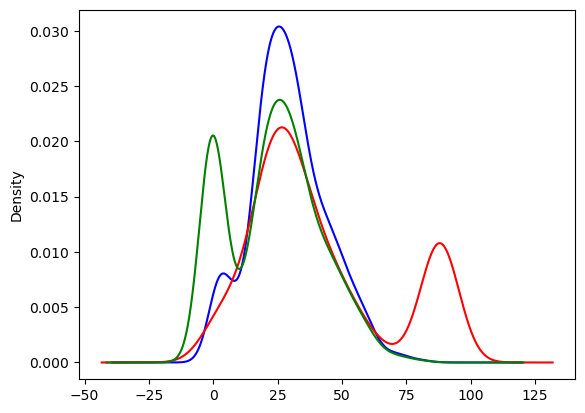

In [18]:
fig=plt.figure()
ax=fig.add_subplot(111)

#age
#variable distribution before imputations
X_train['Age'].plot(kind='kde', ax=ax,color='blue')

#variable distribution after imputations
#88
X_train['age_88'].plot(kind='kde', ax=ax, color='red')
#-1
X_train['age_neg1'].plot(kind='kde', ax=ax, color='green')



<Axes: ylabel='Density'>

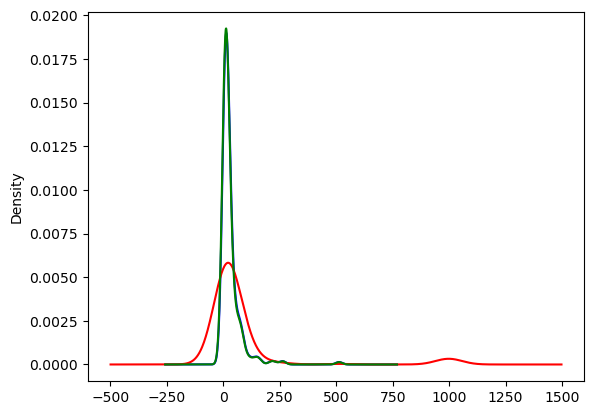

In [19]:
fig=plt.figure()
ax=fig.add_subplot(111)

#fare
#variable distribution before imputations
X_train['Fare'].plot(kind='kde', ax=ax,color='blue')

#variable distribution after imputations
#998
X_train['fare_998'].plot(kind='kde', ax=ax, color='red')
#-1
X_train['fare_neg1'].plot(kind='kde', ax=ax, color='green')


### observations

in fare column distibution shrinks when we imputed 998 for each missing value place, -1 seems to have no effect the graphs overlapped

in age column distribution shrinks in filling with -1 and became bimodel distribution turned right skewed, and on replacing nan with 88 it shrinked more making the graph bimodel with left skewed distriution.